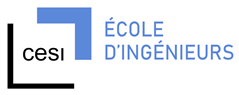


# livrable 4 

# PROJET ESCAPE NO GAME : LIVRABLE 4

### Étude de la situation initiale : 
À la suite d'une mauvaise expérience l'un de nos agents c'est retrouver coincé dans une pièce isolée de toutes ondes magnétiques, nous essayons de prévoir des solutions dans le cas où cette situation se réitérerai. 
Nous avons determiner que le meilleur moyen de communiquer serais d'emmetre un signal sonore à haute fréquence, ce qui permettrais de transmettre des informations en toute discrétion. 

Pour ce faire, nous avons en premier lieu générer un signal sonore puis nous étudier la fréquence qui serai le plus optimal a utiliser et la faisabilité d'un filtrage. 

Nous avons ensuite réaliser la chaîne de transmission de l'information avec une expliquation détaillé de toute la chaîne est des protocoles utilisées. 

Dorénavant nous allons réaliser le code qui va envoyer et reconstituer notre message. 

Pour ce faire, nous allons en premier lieux transformé l'entrée de l'utilisateur en binaire, nous formerons nos trames, puis nous l'encoderons en utilisant la methode manchester, en suite nous procederons a la génération d'un signal sonore et pour finir nous récéptionnerons ce signal et le décoderons.

# importation des bibliotheques

importer des bibliothèques est critique car elle permette d'ajouter indirectement des lignes de code que nous pouvons appeler dans notre programme pour faire des actions bien précises n'étant pas naturellement supporter par python. Par exemple wavio qui nous permet de générer un signal audio.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
import sounddevice as sd
import wavio
from numpy import genfromtxt
from scipy.io.wavfile import write
import scipy
import scipy.signal

# ASSCI vers Binaire 

Pour ce faire, en premier lieu nous demandons à l'utilisateur d'entrer le message qu'il veut transmettre en utilisant la fonction imput qui a pour effet de faire apparaitre une zone laissant à l'utilisateur la capacité de rentrer du texte, mais aussi force le programme à attendre que l'utilisateur est entré les données qu'il veut.

Ensuite nous convertissons le message en binaire pour ce faire, nous prenons chaque caractere dans le message et en premier lieu le convertissons en unicode utilisant la fonction ord() puis une fois cet unicode obtenus, nous le convertissons en binaire a l'aide de la fonction bin() et nous précisons a cette fonction que notre binaire devra etre en base 2 a l'aide de : [2:].
Une fois cette valeur en binaire nous obtenons une valeur avec 7 caractères, le problème c'est que l'ASCII et composer de 8 caractères, pour ce faire, nous ajoutons un 0 au début afin de ne pas changer la valeur de notre résultat tout en rendant notre condition de 8 caractères valides.

pour finir, nous stockons chacun de nos 0 et 1 dans le tableau message bit en utilisant la fonction extend qui permet d'ajouter des choses dans un tableau et nous affichons le message de base et son résultat en binaire. 

In [87]:
print("veuillez entrer le message à transmettre (pas d'espace, d'accents ou de caractères spéciaux) la limite")
print("(imposer par python) est de 177 trames c’est-à-dire 5618 caractères")
print("exemple : message_de_test_plutot_long_pour_verif_si_tout_marche")
message =input()#demande d'entrer le message
#la chaine de charactere la plus longe tester est disponible via le liens suivant si vous voulez (elle fait pile 5618 carac) : 
# https://viacesifr-my.sharepoint.com/:w:/g/personal/cyril_tilhoutriep_viacesi_fr/EfEUkQV7c7JGhE-6pfAFmtoBUNXqGNPEbdIp3sOtCia7ag?e=QK1or6

message_bit=[]                                   # Initialiser une liste qui va contenir le message binaire
test2 = []

for char in message:
    bits='0' + bin(ord(char))[2:]                # on peut aussi utilsier la méthode extend()
    message_bit.extend([int(i) for i in bits])   # permet de rendre la liste en vecteur de valeur entières


    
print('Le message initial:"',message, '"\nLe message binaire: ',message_bit)



veuillez entrer le message à transmettre (pas d'espace, d'accents ou de caractères spéciaux) la limite (imposer par python) est de 177 trames c’est-à-dire 5618 caractères
exemple : message_de_test_plutot_long_pour_verif_si_tout_marche
message_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_

# Mise en trame

La mise en trame consiste à ajouter les elements permettant de rendre la transmission viable, pour ce faire, nous avions, lors des livrables précédents déterminer à quoi devrait ressembler la trame en voici un rappel : 
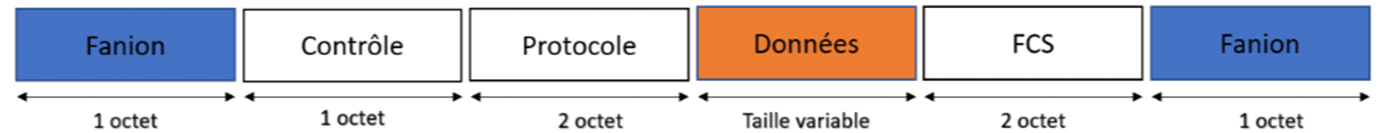
mais, il n'était pas possible de suivre celle-ci pour plusieurs raisons, premièrement, nous n'avons pas réussi à mettre en place la correction d'erreurs et secondairement, le protocole n'a pas à être aussi grand car il n'a qu'à donner la taille des données, nous savons que celle-ci sera forcément du texte.

notre trame sera donc la suivante : 
Fanion, Protocole, Données, Fanion

pour ce programme, l'explication se fera a l'aide des commentaires

In [88]:
paquet=255 #taille des données pures par paquet (limité par la valeur codée en 8 bits)

output=[message_bit[i:i+paquet] for i in range(0,len(message_bit),paquet)]#divise le message en paquets de 225 max (limite 
#déterminer plustot) grace à des sous-listes(forme une liste comprenant au maximum 255 valeur maximum,
#puis s'il reste des données en fait une autre et ainsi de suite).

nuppaq =0 #ici sera stocké le comptage des paquets la valeur influencera aussi le nombre de trame qui sera généré
#par le programme, il est recommandé de le tester avec des longs messages pour voir toutes l'étendue des possibilités 
#de celui-ci 

#/!\ le programme fonctionne pour de très TRES long texte* mais aura une erreur à la reconversion binaire (après la réception) 
#Dû à la lenteur du procédé et du fait que python coupe si le programme n'est pas exécuté en un certain temps (time out).
#l'erreur pourrait être corrigé en rendant le processus moins lourd.
#*Très TRES long texte : tester sur les 40 premières pages d'un livre en anglais (pour eviter les accents)

for inner in output:
    nuppaq = nuppaq+1 #compte les paquets
print('il y a au total',nuppaq,'trames')
#print (output)
#print (inner)

fa = 0,1,1,1,1,1,1,0 #code du fanion 
fanion = "".join([str(_) for _ in fa]) #change le format du fanion en le passant de 0,1,1,... a 011... rendant la manipulation 
#plus simple

#print(fanion)

tramed=[]#ici sera stockée la trame composer final visible dans la section "données qui seront envoyés :" une fois le programme exécuter

A=0 # stock le numéro de la trame visible dans "données trame : [n°trame]" ou "trame [n°trame] complète:" 

while A < nuppaq: #calcule la taille de la trame, ajoute le fanion, les données de la taille du paquet, le paquet et un autre fanion
    datal=0 #stock la taille du paquet qui est en train d'être traiter
    testu = "".join([str(_) for _ in output[A]])#change le format du paquet en cours de traitement en le passant de 0,1,1,... a 011...
    for i in output[A]:#compte la taille du paquet en cours de traitement pour en écrire le protocole
        datal=datal+1 #ajoute 1 pour chaque itération
    protocole= format(datal,'08b') #passe les valeurs int du protocole en valeurs binaires sous la forme 011...
    
    
    ur= fanion+protocole+testu+fanion # fusionne le fanion, notre protocole contenant la taille des données 
    #qui suivronts, les données ainsi que le fanion de fin
    tramed.extend([int(i) for i in ur]) # remet sous forme 0,1,1,... ainsi qu'ajoute a notre message total (stocker dans tramed)
    # les valeurs traiter
    
    #partie affichage des données
    print('données trame :',A+1) #+1 car A part de 0 sauf qu'il est plus logique que la première trame soit la trame une
    print(output[A]) #affiche les données de base sans traitements
    print('')
    print('longeure des données de la trame',datal) #affiche la taille de la trame (protocole mais en int)
    print('long trame traduit en bit pour insertion', protocole) #donne la valeur en binaire du protocole
    print('')
    print('trame', A+1 ,'complete:')#+1 car A part de 0 sauf qu'il est plus logique que la premiere trame soit la trame une
    print(ur) #donne notre trame complète
    print('')
    print('------------------------------------------------------------------------------------------------------------------------------')
    print('')
    A=A+1 #ajoute 1 à notre itération pour pouvoir passer au traitement de la trame suivante
    
print ('données qui seront envoyées :')
print(tramed) #affiche toutes les valeurs de toutes les trames.
G=0 #stock la taille de toutes les donnée
for i in tramed:#compte les données totales qui seront envoyées en bouclant a chaque bits
    G=G+1
print('')
print('il y a au total',G,'bits') #affiche le nombre de bits de notre message

il y a au total 177 trames
données trame : 1
[0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]

longeure des données de la trame 255
long trame traduit en bit pour insertion 11111111

trame 1 complete:
0111111011111111011011010110010101110011011100110110000101100111011001010101111101

# Manchester 

Le codage Manchester permet pour chaque 0 et 1 de rendre un 0 et un 1 ce qui permet d'éviter d'avoir plus de 2 fois d'affiler le même symbole. 
Exemple : 
0,1,1,0 = 1,0,0,1,0,1,1,0

le problème c'est que cela double le nombre de symboles, et donc le temps de transmission, mais cela n'est pas spécifiquement grave étant donné que notre vitesse de transmission est largement assez élevée.

In [89]:
def Manchester(tramed):
    manchester = []
    for i in list(tramed):# check chaque valeur de la liste une par une
        if i == 0:
            manchester.append(1) # et si 1 renvoie 1,0 et inversement pour 0
            manchester.append(0)
        if i == 1:
            manchester.append(0)
            manchester.append(1)
        
    return manchester


message_bit_Manchester=Manchester(tramed) #compile le message converti
print('Le message binaire: ',tramed)
print('Le message binaire codé en Manchester: ',message_bit_Manchester)

Le message binaire:  [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 

# Modulation ASK et creation d'un fichier wav

Afin de pouvoir transmettre notre fichier, nous allons le moduler sur l'amplitude en utilisant une onde porteuse afin que notre signal carré (binaire) soit plus ou moins sinusoïdale (et donc utilisable par des haut-parleurs). 
Puis afin de simuler l'envoi et la réception, nous utiliserons wavio qui écrira un fichier audio que nous pourrons utiliser plus tard.

Nombre de bits à transmettre (message initial): 98384 
 Nombre de symboles: 22 
 Nombre total de bits à transmettre 2164448
le temps de lecture sera de : 49.192 s ou 0.8198666666666666 %minutes
float64


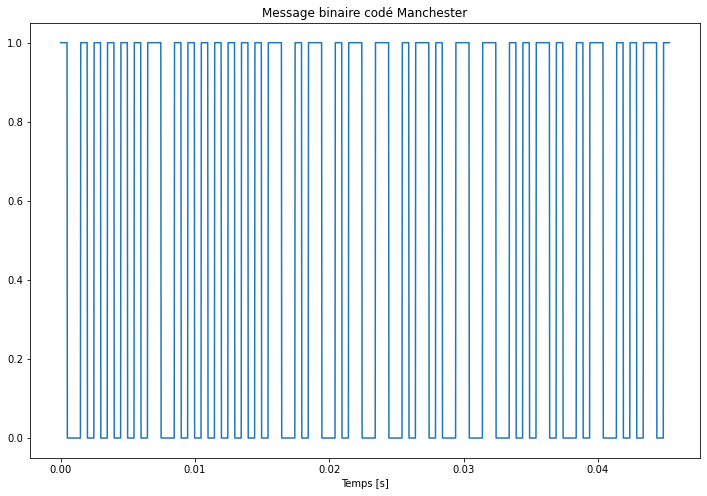

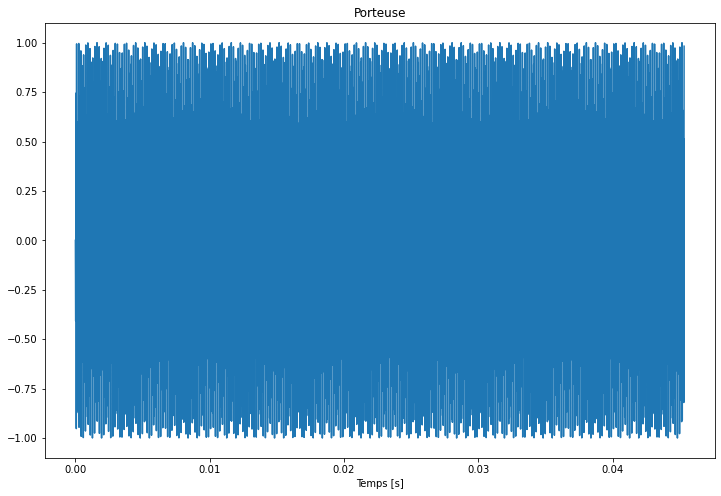

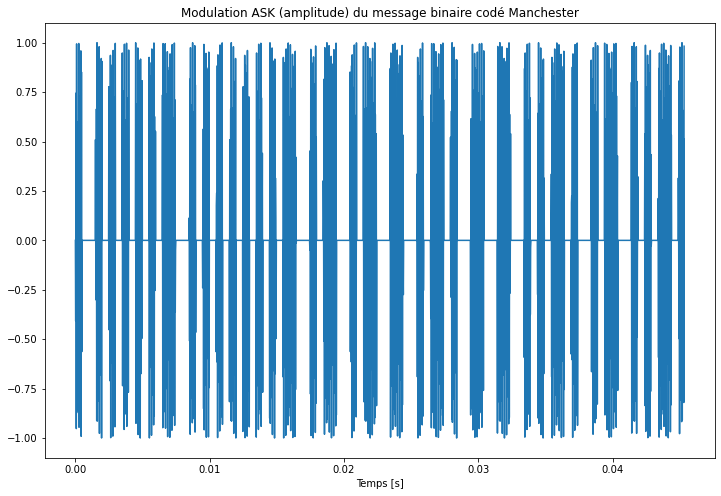

In [90]:
Fe = 44100                           # Fréquence d'échantillonnage
baud = 2000                      # Débit souhaité sur le canal de transmission exprimé en bit/s
Nbits = len(message_bit_Manchester)  # Nombre de bits à transmettre
Ns = int(Fe/baud)                    # Nombre de symboles par bit (Fréq d'echan / Débit binaire)
N = int(Nbits * Ns)                  # Nombre de symboles total à envoyer (Nombre de symboles par bit * Nombre de bits)
Fp = 25000                           # Fréquence de l'onde porteuse
print('Nombre de bits à transmettre (message initial):', Nbits,'\n Nombre de symboles:',Ns,'\n Nombre total de bits à transmettre', N)
# On duplique le message binaire initial Ns fois pour avoir un vecteur de même taille que le temps (t) et qui prend en considération le nombre de symboles par bit
print('le temps de lecture sera de :',Nbits/baud,'s ou',(Nbits/baud)/60,'%minutes')
message_bit_duplique= np.repeat(message_bit_Manchester, Ns)   
# On peut aussi le faire avec la focntion tile de numpy : aa = np.tile(bits,(1,Ns))                                      

t= np.arange (0.0,N)/Fe

# On rélalise la modualtion en amplitude  (ASK= Amp * porteuse)
Porteuse=np.sin(2*np.pi*Fp*t)

ASK =message_bit_duplique*Porteuse

print(ASK.dtype)

# Je ne représente que les 10 premiers bits pour avoir des graphes lisibles

plt.figure (figsize = (12,8))
plt.plot(t[0:2000],message_bit_duplique[0:2000])  # je ne représente que les 1000 premiers échantillons pour mieux voir
plt.xlabel('Temps [s]')
plt.title("Message binaire codé Manchester")

plt.figure (figsize = (12,8))
plt.plot(t[0:2000],Porteuse[0:2000])              # je ne représente que les 1000 premiers échantillons pour mieux voir
plt.xlabel('Temps [s]')
plt.title("Porteuse")

plt.figure (figsize = (12,8))
plt.plot(t[0:2000],ASK[0:2000])                   # je ne représente que les 1000 premiers échantillons pour mieux voir
plt.xlabel('Temps [s]')
plt.title("Modulation ASK (amplitude) du message binaire codé Manchester")

sd.play (ASK)#joue le signal
wavio.write("output3.wav", ASK, Fe, sampwidth=3)#enregistre en wav


# reception du signal 

# Creation d'un fichier txt 

Pour simuler la reception, nous prenons notre signal audio (supposément recu par le micro et intercepter sur le réseau) et le transformons en texte pour pouvoir plus facilement le traiter plus tard.

In [91]:
filename = 'output3.wav'#cherche le fichier au nom output3 wav dans le même répertoire que le programme 
data, Fe = sf.read(filename)#lis le format wav et le met en format texte pour simuler une réception par un micro
#PARAMETRES                          
Nbits = len(data) #Détermine la longueur des données à l'aide des data se trouvant dans le fichier 
print(Nbits)
print (Fe)
np.savetxt('Message3.csv', data, delimiter=',') #enregistre au format txt pour lecture plus tard

2164448
44100


# Demodulation

Celle-ci consiste à isoler le signal binaire cacher dans notre signal modulé pour ce faire en premiers lieux, on isole notre porteuse, puis on l'utilise pour faire la différence entre les deux signaux à l'aide d'une intégration. 
Ensuite, en fonction de ce résultat, on attribue un 1 ou un 0

In [92]:
from numpy import genfromtxt

#Lecture Fichier CSV
ASK1= np.genfromtxt('Message3.csv')

t= np.arange (0.0,N)/Fe;                        # temps pour un symbole

Porteuse=np.sin(2*np.pi*Fp*t)                   # Porteuse
Produit= ASK1*Porteuse                          # Multiplier le signal modulé par le signal de la porteuse utilisée


# Intégration dans le résultat Démod sur période de T =[0, Ns], Ns: taille du symbole envoyé par la méthode des Trapèzes (fonction numpy.trapz en Python).

y= []           # Résultat de l'intégration    

for i in range(0,N,Ns):
    y.append (np.trapz(Produit[i:i+Ns],t[i:i+Ns]))#ecrit le résultat de l'intégration

#print(y)

In [93]:
# si y > 0 donc on a reçu un 1 sinon un -1
message_demodule = np.array(y) > 0   # renvoie True (si >0) ou False sinon

# Decodage du signal démodulé
message_recu_decode= []

for ii in range (0,len(message_demodule)):
    
    if message_demodule [ii] == True: #si on obtient true on met 1 dans le cas contraire 0
        
        message_recu_decode.extend([int(1)]) 
    else:
         message_recu_decode.extend([int(0)]) 
print (message_recu_decode)


[1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 

# Vérification des erreurs en comparant le message initial 

In [94]:
print("Le message binaire envoyé (manchester) est:\n ",message_bit_Manchester)
print("Le message binaire démodulé (manchester) est:\n ", message_recu_decode)
 
# Calculer si erreur de réception
Erreur = []
Erreur =(np.array(message_bit_Manchester) ==np.array(message_demodule))#compare message initial avec le message reçu
#n'est pas réaliste dans notre cas(communication en simplexe), mais c'est le mieux qu'on ai réussit à faire
 
print ("Erreur de réception:\n", Erreur)#affiche false si il y a une erreur

Le message binaire envoyé (manchester) est:
  [1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,

# Decodage manchester 

le décodage Manchester consiste à faire l'inverse du codage, ici cela signifie que si on a 0 et 1 nous obtenons 1.

In [95]:
def Manchester_decode(message_recu_decode):
    decod = []

    for i in range(0,round(len(message_recu_decode)/2)): #on divise par deux cars on veut avancer de deux caractères à chaque iteration
        
        if (message_recu_decode[2*i] == 1 and message_recu_decode[2*i+1] == 0): #si 1 et 0 renvoie 0 et inversement
            decod.append(0)
            
        if (message_recu_decode[2*i] == 0 and message_recu_decode[2*i+1] == 1):
            decod.append(1) 
  
    return decod


message_recu_bin=Manchester_decode(message_recu_decode)
print('Le message binaire décodé en Manchester: ',message_recu_bin)
            

Le message binaire décodé en Manchester:  [0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 

# Récupération des données de chaque trame

Cette opération consiste à isoler les donnés textes de tout le reste (fanion et protocole) pour ce faire, j'ai fait le choix de déjà faire une estimation du nombre de trames se trouvant dans notre message en divisant par le nombre maximum de trames possibles, puis une fois cela fait, j'ignore le fanion et récupére directement la taille donnée par le protocole et commence à traiter les données qui se trouvent derrière. 
L'opération est recommencée tant qu'il rester des information a traiter

In [96]:
tramnumber= len(message_recu_bin)#Prends la taille totale du message
tnum=0 #store le nombre de trames présentes dans le message, afin de pouvoir le décomposer plus tard
while tramnumber>0:#compte combien de fois on peut soustraire la taille maximale d'une trame pour savoir combien il y en a
    knownL= 255+24 #taille max d'une trame (255 : taille max du message et 24 pour les deux fanions et le protocole)
    tramnumber= tramnumber-knownL # on soustrait la taille max possible à la taille des données
    tnum = tnum+1 #on compte le nombre de passages en ajoutant un à tnum à chaque passage

print('il y a',tnum,'trames dans le message recus')# nous donne le nombre de trames 
print('')
print('------------------------------------------------------------------------------------------------------------------------------')
print('')
z=0 # store le nombre d'iteration pour arrêter le boucle suivante au bon moment
store=[]
while z < tnum:#Récupère le protocole pour connaître la taille de la trame, puis isole celle-ci, change son format et la compile aux autres
    add=z*knownL #multiplie la taille max d'une trame au nombre de passages afin de savoir à partir de quand traiter les informations
    akak =message_recu_bin[add+8:add+16]#Récupère le protocole qui se trouvera aux coordonnées 8:16 de notre trame 
    #(on y ajoute aussi celle de la trame à l'aide de ce qui a était calculer plus tot)
    akak2 = "".join([str(_) for _ in akak])#change le format du protocole en le passant de 0,1,1,... a 011... pour rendre les 
    #manipulations plus faciles
    def bindec(n): #fonction qui permet de passer de binaire a décimale elle est utilisé pour trouver la taille du protocole
        return int(n,2) #le, 2 permet de préciser que nous sommes en base 2
    datasize =(bindec(akak2)) #trouve la taille du protocole à l'aide de bindec afin de savoir la taille des données qui suivent
    print('la taille des donnée de la trame',z+1,'est de :',datasize)#affiche les valeurs du protocole (la taille des données qui suivent)
    datas = message_recu_bin[add+16:add+16+datasize]#affiche les données se trouvant au 
    #cordonnées position de la trame +16 : taille des données+ position de la trame+16
    kfc ="".join([str(_) for _ in datas])#change le format des données en le passant de 0,1,1,... a 011... pour rendre les 
    #manipulations plus faciles
    print('les données sont :',kfc)#affiche les données
    print('')
    print('------------------------------------------------------------------------------------------------------------------------------')
    print('')
    store.append(kfc)#stock les données dans un sous-tableau
    z=z+1#ajoute un à notre compteur d'itérations
    
#print(store)

bin_data =''
for elem in store:  #Sort les trames se trouvant dans des sous-tableaux pour en faire une suite sous forme de char
    bin_data += str(elem)

#print (bin_data) 
print("La suite binaire à décoder est:", bin_data) 





il y a 177 trames dans le message recus

------------------------------------------------------------------------------------------------------------------------------

la taille des donnée de la trame 1 est de : 255
les données sont : 011011010110010101110011011100110110000101100111011001010101111101100100011001010101111101110100011001010111001101110100010111110111000001101100011101010111010001101111011101000101111101101100011011110110111001100111010111110111000001101111011101010111001

------------------------------------------------------------------------------------------------------------------------------

la taille des donnée de la trame 2 est de : 255
les données sont : 001011111011101100110010101110010011010010110011001011111011100110110100101011111011101000110111101110101011101000101111101101101011000010111001001100011011010000110010101101101011001010111001101110011011000010110011101100101010111110110010001100101010111

-------------------------------------------------------

# Passage binaire a ASCII

In [98]:
# initialisation d'une chaîne vide pour stocker les données reçues
data_reçu =' '

# Fonction BinarytoDecimal() function (conversion bianire ==> décimal)
def BinaryToDecimal(binary):  
    binary1 = binary 
    decimal, i, n = 0, 0, 0                       # initialisation des variables
    
    while(binary != 0): 
        dec = binary % 10
        decimal = decimal + dec * pow(2, i) 
        binary = binary//10
        i += 1
    return (decimal)

pac = 256
d=0
c=0
# Découper les données binaire d'entrée et la convertir en décimal puis la convertir en chaîne par bloc de 8
out=[bin_data[i:i+pac] for i in range(0,len(bin_data),pac)] #divise en paquet de 256 (divisable par 8)
#print (out)

for ind in out:
    c = c+1 #compte les paquets
#print(c)
while d<c :#afin d'eviter un time out du a la lourdeur du procédé on divise le passage de binaire a 
    #ascii en plusieurs fois, ce qui augmente la taille max du message de 500 caracteres max a plus de 5000
    i=0
    temp = "".join([str(_) for _ in out[d]])
    for i in range(0, len(temp), 8): 
        # découper le bin_data de la plage d'index [0, 8] (car un caractère ASCII est codé sur 8 bits) et le stocker sous forme d'entier dans temp_data
        temp_data = int(temp[i+1:i+8] )

        # Passer (temp_data) dans la fonction BinarytoDecimal ()
        # pour obtenir la valeur décimale correspondante de (temp_data)
        decimal_data = BinaryToDecimal(temp_data)

        # Décodage de la valeur décimale renvoyée par
        # la Fonction BinarytoDecimal (), en utilisant chr ()
        # fonction qui renvoie la chaîne correspondante
        # caractère pour une valeur ASCII donnée et enregistré
        # dans data_recu
        data_reçu = data_reçu + chr(decimal_data) 
    d=d+1
    #print (d)

# Affichage du result 
print("Le message reçu est :", 
      data_reçu) 

Le message reçu est :  message_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_long_pour_verif_si_tout_marchemessage_de_test_plutot_